In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install xgboost
import warnings
warnings.filterwarnings("ignore")


#import classification models from sckitlearn
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#Import evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
#pip install numpy pandas scikit-learn tensorflow

In [ ]:
#loading dataset
data = pd.read_csv(r"/content/Health Q's Employee Data.csv")

In [ ]:
data.head()

,Age,EmployeeNumber,Gender,BusinessTravel,Department,DistanceFromHome,Education,Education Level,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLifeBalance_cat,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,Female,Travel_Rarely,Sales,1,2,College,Life Sciences,2,...,1,8,0,1,Bad,6,4,0,5,Yes
1,49,2,Male,Travel_Frequently,Research & Development,8,1,Below college,Life Sciences,3,...,4,10,3,3,Better,10,7,1,7,No
2,37,4,Male,Travel_Rarely,Research & Development,2,2,College,Other,4,...,2,7,3,3,Better,0,0,0,0,Yes
3,33,5,Female,Travel_Frequently,Research & Development,3,4,Master,Life Sciences,4,...,3,8,3,3,Better,8,7,3,0,No
4,27,7,Male,Travel_Rarely,Research & Development,2,1,Below college,Medical,1,...,4,6,3,3,Better,2,2,2,2,No


In [ ]:
data2 = data.copy

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   EmployeeNumber            1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   Education Level           1470 non-null   object
 8   EducationField            1470 non-null   object
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Environ_Satisf_Categry    1470 non-null   object
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
# Convert 'TotalCharges' column to float
#data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check the data types of columns after conversion
#print(data.dtypes)


In [ ]:
data.duplicated().sum()

0

In [ ]:
data1 = data.copy()

In [ ]:
#checking statiscal describtion
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0


In [ ]:
cat_df = data.select_dtypes(include ="object")

In [ ]:
cat_df.describe().T

,count,unique,top,freq
Gender,1470,2,Male,882
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education Level,1470,5,Bachelor,572
EducationField,1470,3,Life Sciences,1468
Environ_Satisf_Categry,1470,4,High,453
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
cat_df.columns

Index(['Gender', 'BusinessTravel', 'Department', 'Education Level',
       'EducationField', 'Environ_Satisf_Categry', 'JobRole', 'MaritalStatus',
       'Over18', 'OverTime', 'WorkLifeBalance_cat', 'Attrition'],
      dtype='object')

In [ ]:
# investigate the missing data
null_vals = data.isnull().sum()
null_vals

Age                         0
EmployeeNumber              0
Gender                      0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
Education Level             0
EducationField              0
EnvironmentSatisfaction     0
Environ_Satisf_Categry      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
WorkLifeBalance_cat         0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

## CLASSIFICATION ANALYSIS
In classification analysis the goal is to build a predictive model that will "CLASSIFY" output.

### Phase 1
- Preparing and Processing Data for Modelling
- variable encoding
- segment data
- scale & nomalize data

In [ ]:
#data.drop(columns=["tenure_category"], inplace=True)

In [ ]:
data

,Age,EmployeeNumber,Gender,BusinessTravel,Department,DistanceFromHome,Education,Education Level,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLifeBalance_cat,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,Female,Travel_Rarely,Sales,1,2,College,Life Sciences,2,...,1,8,0,1,Bad,6,4,0,5,Yes
1,49,2,Male,Travel_Frequently,Research & Development,8,1,Below college,Life Sciences,3,...,4,10,3,3,Better,10,7,1,7,No
2,37,4,Male,Travel_Rarely,Research & Development,2,2,College,Other,4,...,2,7,3,3,Better,0,0,0,0,Yes
3,33,5,Female,Travel_Frequently,Research & Development,3,4,Master,Life Sciences,4,...,3,8,3,3,Better,8,7,3,0,No
4,27,7,Male,Travel_Rarely,Research & Development,2,1,Below college,Medical,1,...,4,6,3,3,Better,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2061,Male,Travel_Frequently,Research & Development,23,2,College,Life Sciences,3,...,3,17,3,3,Better,5,2,0,3,No
1466,39,2062,Male,Travel_Rarely,Research & Development,6,1,Below college,Life Sciences,4,...,1,9,5,3,Better,7,7,1,7,No
1467,27,2064,Male,Travel_Rarely,Research & Development,4,3,Bachelor,Life Sciences,2,...,2,6,0,3,Better,6,2,0,3,No
1468,49,2065,Male,Travel_Frequently,Sales,2,3,Bachelor,Life Sciences,4,...,4,17,3,2,Good,9,6,0,8,No


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#import category_encoders as ce
# Create DataFrame
data = pd.DataFrame(data)

# Perform one-hot encoding
df = pd.get_dummies(data,dtype="int64",drop_first=True)


# Initialize BinaryEncoder
#binary_encoder = ce.BinaryEncoder(data)
# Fit and transform data
#data = binary_encoder.fit_transform(obj)



    # Define columns to be encoded
#columns_to_encode = [#'gender', 'Partner', 'Dependents', 'PhoneService','tenure_category',
                     #'MultipleLines', 'InternetService', 'OnlineSecurity',
                    # 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    #'StreamingTV', 'StreamingMovies', 'Contract',
                     #'PaperlessBilling', 'PaymentMethod','Churn']

# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Encode categorical columns
#for column in columns_to_encode:
    #data[column] = label_encoder.fit_transform(data[column])

In [ ]:
#data

In [ ]:
df

,Age,EmployeeNumber,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,WorkLifeBalance_cat_Best,WorkLifeBalance_cat_Better,WorkLifeBalance_cat_Good,Attrition_Yes
0,41,1,1,2,2,3,2,4,5993,8,...,0,1,0,0,1,1,0,0,0,1
1,49,2,8,1,3,2,2,2,5130,1,...,1,0,0,1,0,0,0,1,0,0
2,37,4,2,2,4,2,1,3,2090,6,...,0,0,0,0,1,1,0,1,0,1
3,33,5,3,4,4,3,1,3,2909,1,...,1,0,0,1,0,1,0,1,0,0
4,27,7,2,1,1,3,1,2,3468,9,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2061,23,2,3,4,2,4,2571,4,...,0,0,0,1,0,0,0,1,0,0
1466,39,2062,6,1,4,2,3,1,9991,4,...,0,0,0,1,0,0,0,1,0,0
1467,27,2064,4,3,2,4,2,2,6142,1,...,0,0,0,1,0,1,0,1,0,0
1468,49,2065,2,3,4,2,2,2,5390,2,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
#segment data set
y = df.pop("Attrition_Yes")

In [ ]:
#y = data.pop('Churn')

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_Yes, Length: 1470, dtype: int64

In [ ]:
#!pip install tpot

In [ ]:
#scaling dataset
#importing the standard scaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
#instantiate scaler
scaler = MinMaxScaler()

#instantiate scaler object
#scaler = StandardScaler()

#instantiate Robustscaler
#scaler = RobustScaler()

# Create a Normalizer object
#scaler = Normalizer()

scaled_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)


In [ ]:
# We tried different scaling methods but the MinMax Scaler gave the best result

In [ ]:
#data.info()

In [ ]:
#segment data set
#yf = data.pop("Churn")

In [ ]:
#yf

In [ ]:
#split data into training and validation sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(scaled_df,y,test_size=0.2,random_state=42)

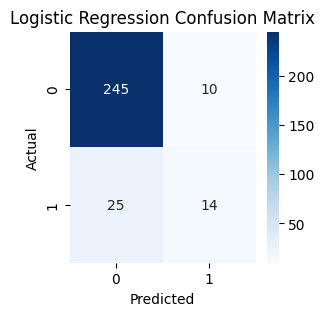

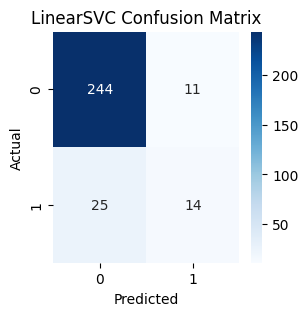

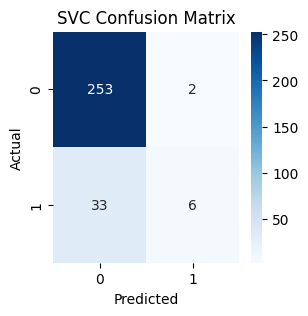

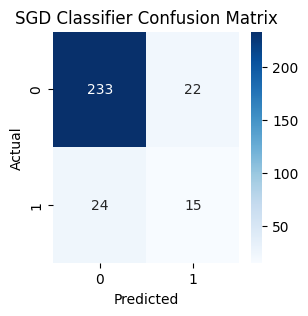

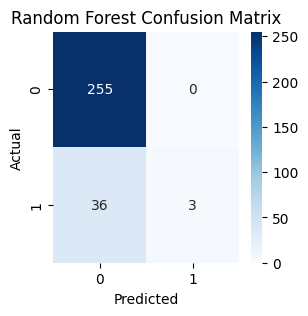

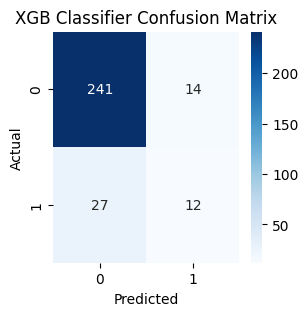

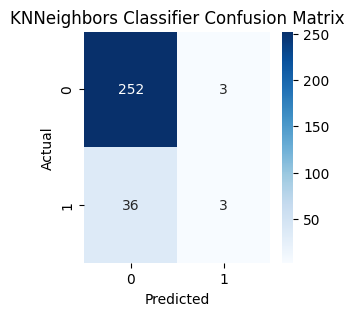

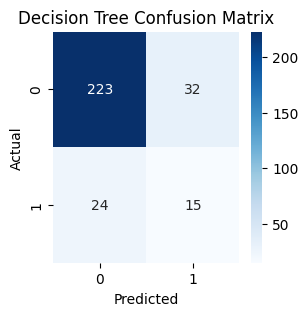

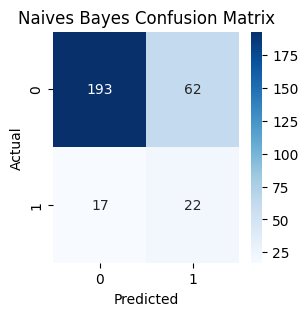

Training, testing and evaluation of all the selected models is now completed


In [ ]:
classifiers = [
               [LogisticRegression(), 'Logistic Regression'],
               [LinearSVC(), 'LinearSVC'],
               [SVC(), 'SVC'],
               [SGDClassifier(), 'SGD Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [XGBClassifier(), 'XGB Classifier'],
               [KNeighborsClassifier(), 'KNNeighbors Classifier'],
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
               [GaussianNB(), 'Naives Bayes'],


              ]

# Initialing dictionaries that will hold the output of the chosen evaluation metrics
acc_list = {}
precision_list = {}
recall_list = {}
f1_list = {}
roc_list = {}

# Loop to train, test, generate metrics and create confusion matrices for each algorithm
for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]

    pred = model.predict(X_test.values)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = str(round(a_score*100, 2)) + '%'
    precision_list[model_name] = str(round(p_score*100, 2)) + '%'
    recall_list[model_name] = str(round(r_score*100, 2)) + '%'
    f1_list[model_name] = str(round(f_score*100, 2)) + '%'
    roc_list[model_name] = str(round(roc_score*100, 2)) + '%'

    #Creating a Confusion Matrix
    cm = confusion_matrix(y_test, pred)

    #Visualizing confusion matrix
    plt.figure(figsize = (3,3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    if model_name == classifiers[-1][1]:
        print('Training, testing and evaluation of all the selected models is now completed')

In [ ]:
print('Consolidated Report')
s1 = pd.DataFrame([acc_list,precision_list,recall_list,f1_list,roc_list], index = ['Accuracy Score','Precision Score','Recall Score','F1 Score','ROC Score'])
s1.head()

Consolidated Report


,Logistic Regression,LinearSVC,SVC,SGD Classifier,Random Forest,XGB Classifier,KNNeighbors Classifier,Decision Tree,Naives Bayes
Accuracy Score,88.1%,87.76%,88.1%,84.35%,87.76%,86.05%,86.73%,80.95%,73.13%
Precision Score,58.33%,56.0%,75.0%,40.54%,100.0%,46.15%,50.0%,31.91%,26.19%
Recall Score,35.9%,35.9%,15.38%,38.46%,7.69%,30.77%,7.69%,38.46%,56.41%
F1 Score,44.44%,43.75%,25.53%,39.47%,14.29%,36.92%,13.33%,34.88%,35.77%
ROC Score,65.99%,65.79%,57.3%,64.92%,53.85%,62.64%,53.26%,62.96%,66.05%


**HYPER-PARAMETER TUNNING USING : GridSearchCV**

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Initialing dictionaries that will hold the output of the chosen evaluation metrics
acc_list = {}
precision_list = {}
recall_list = {}
f1_list = {}
roc_list = {}

# Define parameter grids for each classifier
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l1', 'l2']
    },
    'LinearSVC': {
        'C': [0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge'],
        'penalty': ['l1', 'l2']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'SGD Classifier': {
        'alpha': [0.0001, 0.001, 0.01],
        'loss': ['hinge', 'log'],
        'penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'XGB Classifier': {
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5]
    },
    'KNeighbors Classifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Naive Bayes': {}
}

# Define classifiers
classifiers = [
    (LogisticRegression(), 'Logistic Regression'),
    (LinearSVC(), 'LinearSVC'),
    (SVC(), 'SVC'),
    (SGDClassifier(), 'SGD Classifier'),
    (RandomForestClassifier(), 'Random Forest'),
    (XGBClassifier(), 'XGB Classifier'),
    (KNeighborsClassifier(), 'KNeighbors Classifier'),
    (DecisionTreeClassifier(), 'Decision Tree'),
    (GaussianNB(), 'Naive Bayes')
]

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Classifier', 'Best Parameters', 'Best Score', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'ROC AUC Score'])

# Loop through each classifier and perform GridSearchCV
for classifier, name in classifiers:
    param_grid = param_grids.get(name, {})
    grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    param_grid_name = name


    # Store results in the DataFrame
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(best_params)
    print(best_score)
    #best_score = grid_search.best_score_)

    # Calculate additional evaluation metrics
    y_predd = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_predd)
    precision = precision_score(y_test, y_predd)
    recall = recall_score(y_test, y_predd)
    f1 = f1_score(y_test, y_predd)
    roc_auc = roc_auc_score(y_test, y_predd)


    acc_list[param_grid_name] = str(round( accuracy*100, 2)) + '%'
    precision_list[param_grid_name] = str(round(precision*100, 2)) + '%'
    recall_list[param_grid_name] = str(round(recall*100, 2)) + '%'
    f1_list[param_grid_name] = str(round(f1*100, 2)) + '%'
    roc_list[param_grid_name] = str(round(roc_auc*100, 2)) + '%'


{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.8732993197278911
{'C': 10, 'loss': 'hinge', 'penalty': 'l2'}
0.8758503401360543
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.8767006802721089
{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}
0.8673469387755102
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
0.8571428571428572
{'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5}
0.8690476190476191
{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
0.848639455782313
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.820578231292517
{}
0.636904761904762


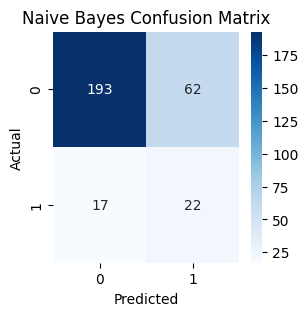

In [ ]:
    #Creating a Confusion Matrix
    cm = confusion_matrix(y_test, y_predd)

    #Visualizing confusion matrix
    plt.figure(figsize = (3,3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

In [ ]:
print('Consolidated Report')
s2 = pd.DataFrame([acc_list,precision_list,recall_list,f1_list,roc_list], index = ['Accuracy Score','Precision Score','Recall Score','F1 Score','ROC Score'])
s2.head()

Consolidated Report


,Logistic Regression,LinearSVC,SVC,SGD Classifier,Random Forest,XGB Classifier,KNeighbors Classifier,Decision Tree,Naive Bayes
Accuracy Score,88.44%,87.76%,87.07%,88.44%,87.76%,85.71%,88.1%,83.33%,73.13%
Precision Score,60.87%,55.17%,51.61%,64.71%,80.0%,43.48%,100.0%,32.14%,26.19%
Recall Score,35.9%,41.03%,41.03%,28.21%,10.26%,25.64%,10.26%,23.08%,56.41%
F1 Score,45.16%,47.06%,45.71%,39.29%,18.18%,32.26%,18.6%,26.87%,35.77%
ROC Score,66.18%,67.96%,67.57%,62.93%,54.93%,60.27%,55.13%,57.81%,66.05%


**RandomizedSearchCV**

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243
Best parameters: {'ada__learning_rate': 0.8731034258755935, 'ada__n_estimators': 121, 'dt__max_depth': 14, 'et__max_depth': 4, 'et__n_estimators': 42, 'gb__learning_rate': 0.02906750508580709, 'gb__n_estimators': 111, 'knn__n_neighbors': 24, 'lda__shrinkage': 0.6659223566174967, 'lgbm__learning_rate': 0.18

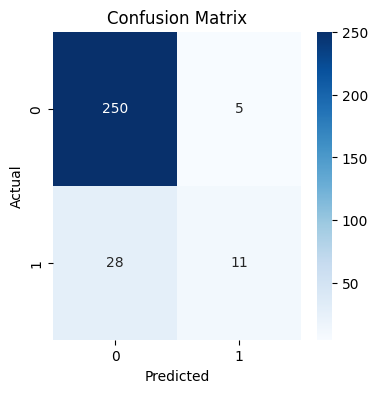

In [ ]:
!pip install --upgrade scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis # Import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns

# Initialing dictionaries that will hold the output of the chosen evaluation metrics
acc_list = {}
precision_list = {}
recall_list = {}
f1_list = {}
roc_list = {}

# Define the classifiers
classifiers = [
    ('log_reg', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB()),
    ('sgd', SGDClassifier(loss='log_loss')),
    # Remove RidgeClassifier since it does not have predict_proba
    ('lgbm', LGBMClassifier()),
    ('ada', AdaBoostClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('et', ExtraTreesClassifier()),
    ('lda', LinearDiscriminantAnalysis(solver='lsqr')),
    ('qda', QuadraticDiscriminantAnalysis())
]

# Define a voting classifier
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Define hyperparameter grid
param_grid = {
    'log_reg__C': uniform(0.01, 10),
    'svc__C': uniform(0.01, 10),
    'svc__gamma': uniform(0.001, 1),
    'rf__n_estimators': randint(10, 200),
    'rf__max_depth': randint(3, 20),
    'xgb__n_estimators': randint(50, 200),
    'xgb__learning_rate': uniform(0.01, 0.3),
    'knn__n_neighbors': randint(1, 30),
    'dt__max_depth': randint(3, 20),
    'sgd__alpha': uniform(0.0001, 0.1),
    'lgbm__n_estimators': randint(50, 200),
    'lgbm__learning_rate': uniform(0.01, 0.3),
    'ada__n_estimators': randint(50, 200),
    'ada__learning_rate': uniform(0.01, 1),
    'gb__n_estimators': randint(50, 200),
    'gb__learning_rate': uniform(0.01, 0.3),
    'et__n_estimators': randint(10, 200),
    'et__max_depth': randint(3, 20),
    'lda__shrinkage': uniform(0.0, 1.0)
}


# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=voting_clf, param_distributions=param_grid, n_iter=10, cv=4, scoring='accuracy', random_state=42, verbose=2, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best estimator
best_voting_clf = random_search.best_estimator_

# Predict on test data
y_pred = best_voting_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Store the results
acc_list['Voting Classifier'] = str(round(accuracy * 100, 2)) + '%'
precision_list['Voting Classifier'] = str(round(precision * 100, 2)) + '%'
recall_list['Voting Classifier'] = str(round(recall * 100, 2)) + '%'
f1_list['Voting Classifier'] = str(round(f1 * 100, 2)) + '%'
roc_list['Voting Classifier'] = str(round(roc_auc * 100, 2)) + '%'

# Print results
print(f'Best parameters: {random_search.best_params_}')
print(f'Accuracy Score: {accuracy * 100:.2f}%')
print(f'Precision Score: {precision * 100:.2f}%')
print(f'Recall Score: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'ROC AUC Score: {roc_auc * 100:.2f}%')

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**VotingClassifier with RandomizedSearchCV**
An ENSEMBLE METHOD FOR HYPER-PARAMETER TUNNING

In [ ]:
!pip install --upgrade scikit-learn
# Upgrade scikit-learn to the latest version to include '_fit_context'
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint

# Initialing dictionaries that will hold the output of the chosen evaluation metrics
acc_list = {}
precision_list = {}
recall_list = {}
f1_list = {}
roc_list = {}

# Define the classifiers
classifiers = [
    ('log_reg', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB())
]

# Define a voting classifier
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Define hyperparameter grid
param_grid = {
    'log_reg__C': uniform(0.01, 10),
    'svc__C': uniform(0.01, 10),
    'svc__gamma': uniform(0.001, 1),
    'rf__n_estimators': randint(10, 200),
    'rf__max_depth': randint(3, 20),
    'xgb__n_estimators': randint(50, 200),
    'xgb__learning_rate': uniform(0.01, 0.3),
    'knn__n_neighbors': randint(1, 30),
    'dt__max_depth': randint(3, 20),
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=voting_clf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, verbose=2, n_jobs=-1)


# Fit the model
random_search.fit(X_train, y_train)

# Best estimator
best_voting_clf = random_search.best_estimator_

# Predict on test data
y_pred = best_voting_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')


acc_list[best_voting_clf] = str(round( accuracy*100, 2)) + '%'
precision_list[best_voting_clf] = str(round(precision*100, 2)) + '%'
recall_list[best_voting_clf] = str(round(recall*100, 2)) + '%'
f1_list[best_voting_clf] = str(round(f1*100, 2)) + '%'
roc_list[best_voting_clf] = str(round(roc_auc*100, 2)) + '%'


# Print results
print(f'Best parameters: {random_search.best_params_}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'dt__max_depth': 3, 'knn__n_neighbors': 12, 'log_reg__C': 2.944881747180381, 'rf__max_depth': 13, 'rf__n_estimators': 90, 'svc__C': 7.123419527486499, 'svc__gamma': 0.7911755405312056, 'xgb__learning_rate': 0.19178799243430342, 'xgb__n_estimators': 90}
Accuracy Score: 0.8877551020408163
Precision Score: 0.8787941937338316
Recall Score: 0.8877551020408163
F1 Score: 0.8575593502707205
ROC AUC Score: 0.5986425339366516
Confusion Matrix:
[[253   2]
 [ 31   8]]


In [ ]:
print('Consolidated Report')
s3 = pd.DataFrame([acc_list,precision_list,recall_list,f1_list,roc_list], index = ['Accuracy Score','Precision Score','Recall Score','F1 Score','ROC Score'])
s3.head()

Consolidated Report


,"VotingClassifier(estimators=[('log_reg',\n LogisticRegression(C=2.944881747180381)),\n ('svc',\n SVC(C=7.123419527486499, gamma=0.7911755405312056,\n probability=True)),\n ('rf',\n RandomForestClassifier(max_depth=13,\n n_estimators=90)),\n ('xgb',\n XGBClassifier(base_score=None, booster=None,\n callbacks=None,\n colsample_bylevel=None,\n colsample_bynode=None,\n colsample_bytree=None, de...\n max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None,\n max_leaves=None,\n min_child_weight=None, missing=nan,\n monotone_constraints=None,\n multi_strategy=None,\n n_estimators=90, n_jobs=None,\n num_parallel_tree=None,\n random_state=None, ...)),\n ('knn', KNeighborsClassifier(n_neighbors=12)),\n ('dt', DecisionTreeClassifier(max_depth=3)),\n ('nb', GaussianNB())],\n voting='soft')"
Accuracy Score,88.78%
Precision Score,87.88%
Recall Score,88.78%
F1 Score,85.76%
ROC Score,59.86%


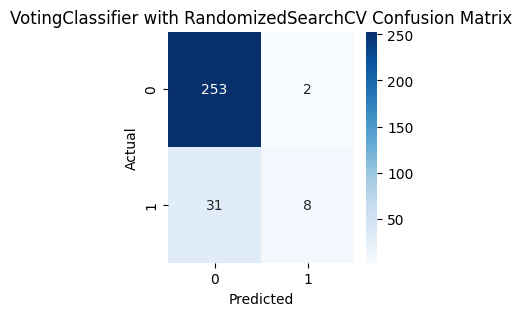

In [ ]:
 #Creating a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#Visualizing confusion matrix
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('VotingClassifier with RandomizedSearchCV Confusion Matrix')
plt.show()

Advanced hyperparameter optimization techniques like **Bayesian Optimization and more robust cross-validation methods** such as Stratified K-Fold Cross-Validation.

In [ ]:
!pip install scikit-optimize scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the classifiers
classifiers = [
    ('log_reg', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB())
]

# Define hyperparameter search space for Bayesian Optimization
param_grid = {
    'log_reg__C': Real(0.01, 10, prior='log-uniform'),
    'svc__C': Real(0.01, 10, prior='log-uniform'),
    'svc__gamma': Real(0.001, 1, prior='log-uniform'),
    'rf__n_estimators': Integer(10, 200),
    'rf__max_depth': Integer(3, 20),
    'xgb__n_estimators': Integer(50, 200),
    'xgb__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'knn__n_neighbors': Integer(1, 30),
    'dt__max_depth': Integer(3, 20)
}


In [ ]:
# Define the VotingClassifier
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Bayesian Optimization with Stratified K-Fold Cross-Validation
bayes_search = BayesSearchCV(
    estimator=voting_clf,
    search_spaces=param_grid,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit the model
bayes_search.fit(X_train, y_train)

# Best estimator
best_voting_clf = bayes_search.best_estimator_

# Predict on test data
y_pred = best_voting_clf.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

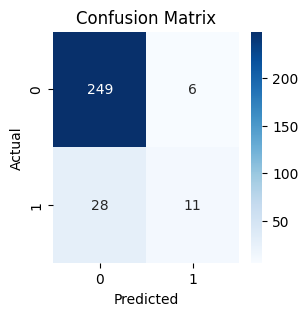

In [ ]:
# Calculate evaluation metrics

# Initialing dictionaries that will hold the output of the chosen evaluation metrics
acc_list = {}
precision_list = {}
recall_list = {}
f1_list = {}
roc_list = {}

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

acc_list[best_voting_clf] = str(round( accuracy*100, 2)) + '%'
precision_list[best_voting_clf] = str(round(precision*100, 2)) + '%'
recall_list[best_voting_clf] = str(round(recall*100, 2)) + '%'
f1_list[best_voting_clf] = str(round(f1*100, 2)) + '%'
roc_list[best_voting_clf] = str(round(roc_auc*100, 2)) + '%'

# Print results
#print(f'Best parameters: {bayes_search.best_params_}')
#print(f'Accuracy Score: {accuracy * 100:.2f}%')
#print(f'Precision Score: {precision * 100:.2f}%')
#print(f'Recall Score: {recall * 100:.2f}%')
#print(f'F1 Score: {f1 * 100:.2f}%')
#print(f'ROC AUC Score: {roc_auc * 100:.2f}%')


# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Consolidated Report')
s4 = pd.DataFrame([acc_list,precision_list,recall_list,f1_list,roc_list], index = ['Accuracy Score','Precision Score','Recall Score','F1 Score','ROC Score'])
s4.head()

Consolidated Report


,"VotingClassifier(estimators=[('log_reg',\n LogisticRegression(C=3.3595660531455516)),\n ('svc',\n SVC(C=5.218177140525889,\n gamma=0.0025035182536236556,\n probability=True)),\n ('rf',\n RandomForestClassifier(max_depth=18,\n n_estimators=150)),\n ('xgb',\n XGBClassifier(base_score=None, booster=None,\n callbacks=None,\n colsample_bylevel=None,\n colsample_bynode=None,\n colsample_bytree=No...\n max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None,\n max_leaves=None,\n min_child_weight=None, missing=nan,\n monotone_constraints=None,\n multi_strategy=None,\n n_estimators=61, n_jobs=None,\n num_parallel_tree=None,\n random_state=None, ...)),\n ('knn', KNeighborsClassifier(n_neighbors=1)),\n ('dt', DecisionTreeClassifier(max_depth=3)),\n ('nb', GaussianNB())],\n voting='soft')"
Accuracy Score,88.44%
Precision Score,86.55%
Recall Score,88.44%
F1 Score,86.4%
ROC Score,62.93%


**Stacking (Stacked Generalization.**)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(3, 20)
}

# RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid_rf,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Best Random Forest model
best_rf = rf_random_search.best_estimator_

# Update the base models with the tuned Random Forest
base_models = [
    ('log_reg', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('rf', best_rf),  # Use the tuned Random Forest
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB())
]

# Define the meta-model (final estimator) for the stacking classifier
# Example: Using Logistic Regression as the meta-model
meta_model = LogisticRegression()

# Recreate and retrain the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

stacking_clf.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


StackingClassifier(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x7E385E01CC40, shuffle=False),
                   estimators=[('log_reg', LogisticRegression()),
                               ('svc', SVC(probability=True)),
                               ('rf',
                                RandomForestClassifier(max_depth=13,
                                                       n_estimators=97)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_byn...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression(), n_jobs=-1)

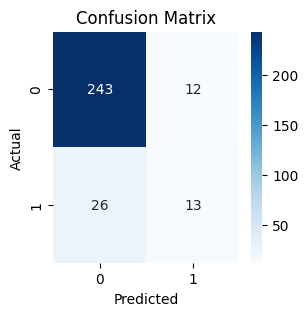

In [ ]:
# Predict on test data
y_pred = stacking_clf.predict(X_test)

# Calculate evaluation metrics

# Initialing dictionaries that will hold the output of the chosen evaluation metrics
acc_list = {}
precision_list = {}
recall_list = {}
f1_list = {}
roc_list = {}

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Use stacking_clf as the key in the dictionaries
acc_list[stacking_clf] = str(round( accuracy*100, 2)) + '%'
precision_list[stacking_clf] = str(round(precision*100, 2)) + '%'
recall_list[stacking_clf] = str(round(recall*100, 2)) + '%'
f1_list[stacking_clf] = str(round(f1*100, 2)) + '%'
roc_list[stacking_clf] = str(round(roc_auc*100, 2)) + '%'

# Print results
#print(f'Best parameters: {bayes_search.best_params_}')
#print(f'Accuracy Score: {accuracy * 100:.2f}%')
#print(f'Precision Score: {precision * 100:.2f}%')
#print(f'Recall Score: {recall * 100:.2f}%')
#print(f'F1 Score: {f1 * 100:.2f}%')
#print(f'ROC AUC Score: {roc_auc * 100:.2f}%')

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print('Consolidated Report')
s5 = pd.DataFrame([acc_list,precision_list,recall_list,f1_list,roc_list], index = ['Accuracy Score','Precision Score','Recall Score','F1 Score','ROC Score'])
s5.head()

Consolidated Report


,"StackingClassifier(cv=StratifiedKFold(n_splits=5,\n random_state=RandomState(MT19937) at 0x7E385E01CC40, shuffle=False),\n estimators=[('log_reg', LogisticRegression()),\n ('svc', SVC(probability=True)),\n ('rf',\n RandomForestClassifier(max_depth=13,\n n_estimators=97)),\n ('xgb',\n XGBClassifier(base_score=None, booster=None,\n callbacks=None,\n colsample_bylevel=None,\n colsample_byn...\n max_cat_to_onehot=None,\n max_delta_step=None,\n max_depth=None, max_leaves=None,\n min_child_weight=None,\n missing=nan,\n monotone_constraints=None,\n multi_strategy=None,\n n_estimators=None, n_jobs=None,\n num_parallel_tree=None,\n random_state=None, ...)),\n ('knn', KNeighborsClassifier()),\n ('dt', DecisionTreeClassifier()),\n ('nb', GaussianNB())],\n final_estimator=LogisticRegression(), n_jobs=-1)"
Accuracy Score,87.07%
Precision Score,85.25%
Recall Score,87.07%
F1 Score,85.83%
ROC Score,64.31%


- XAI
- - LIME
- - SHAP

In [ ]:
# XAI-----SHAP
#import shap

# Initialize a SHAP explainer object with the fitted logistic regression model
#explainer = shap.Explainer(log_c, X_train)

# Calculate SHAP values for the test set
#shap_values = explainer.shap_values(X_test)

# Plot summary plot
#shap.summary_plot(shap_values, X_test)


In [ ]:
pip install lime

In [ ]:
# LIME XAI
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# Initialize LIME explainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Existing cust', 'Churned cust'])

# Select a sample from the test set for explanation
sample_idx = 0  # Choose the index of the sample you want to explain
sample = X_test.iloc[sample_idx]

# Explain the model's prediction for the selected sample
exp = explainer.explain_instance(sample.values, log_c.predict_proba, num_features=len(X_train.columns))


# Print the explanation
#print('Explanation for prediction:')
#print(exp.as_list())


# Visualize the explanation
exp.show_in_notebook(show_table=True)

NameError: name 'log_c' is not defined

In [ ]:
#pip install --upgrade pip

In [ ]:
#!pip install tensorflow

- FEED FORWARD DEEP LEARNING

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(scaled_df,y,test_size=0.3,random_state=42)

In [ ]:
# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Validation accuracy: {accuracy:.2f}')